# Lesson 3 - Machine Learning

## Introduction

![](https://imgs.xkcd.com/comics/machine_learning.png)

In traditional programming, we take a problem, break it down into specific steps and figure out how to instruct the computer to perform those steps. It requires us as the programmer to figure out how to solve the problem, and we *explicitly* tell the computer how to do things. Machine learning is a whole new paradigm - rather that telling the computer what to do, we show it examples of what we'd like done, and it *learns* how to perform the task. It's magical - provided we can get enough examples, and assuming we have a good way for the computer to 'learn'!

There are many different learning algorithms, but for this course we're not going to go deep into the inner workings. Instead, we'll look at a few that illustrate the concepts and show you how to use these in a practical setting - you can always explore more if you're interested. 

Open in colab and follow along:

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/johnowhitaker/ds_zero/blob/master/03_Machine_Learning.ipynb)

## Meet the Data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
mtcars = pd.read_csv('https://gist.githubusercontent.com/wmeints/80c1ba22ceeb7a29a0e5e979f0b0afba/raw/8629fe51f0e7642fc5e05567130807b02a93af5e/auto-mpg.csv')
print(mtcars.shape)
mtcars.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mtcars.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
mtcars.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Where is horsepower? If a column doesn't show up in the output of describe, it's a good bet that it's been interpreted as a string column or some other non-numeric type. Use `.info()` to verify this:

In [ ]:
# Exercise: run mtcars.info() for more information on how pandas is representing the different columns

Looking into it further, we discover that horsepower has some '?'s in it. Let's fix this by first removing the problematic values, then converting the column to a numeric type, and then finally replacing the missing values with the median value.

In [ ]:
mtcars['horsepower'] = mtcars['horsepower'].replace('?', np.NaN) # Replacing with NaN
mtcars['horsepower'] = mtcars['horsepower'].astype(float) # Would int be OK here?
mtcars['horsepower'] = mtcars['horsepower'].fillna(mtcars['horsepower'].median())
mtcars.describe() # Now we're talking

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


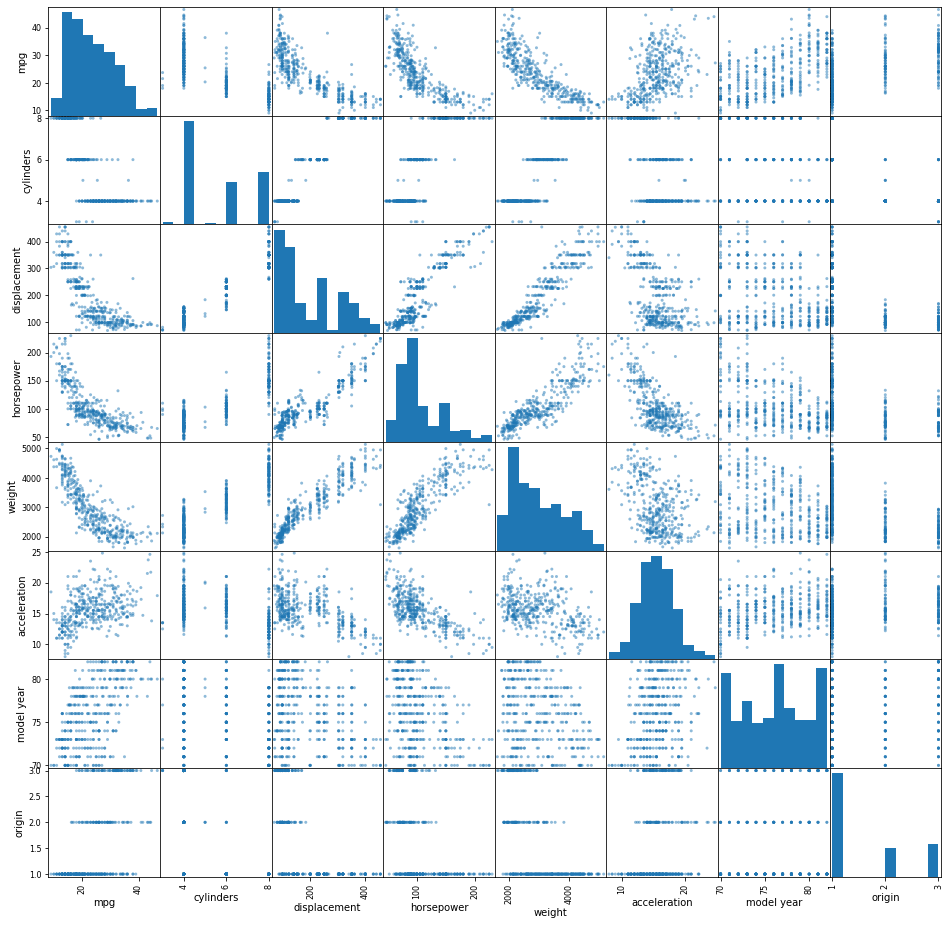

In [ ]:
pd.plotting.scatter_matrix(mtcars, figsize=(16, 16))
plt.show()

## Starting Simple: Linear Regression

We're going to start with possibly THE simplest model - a straight line. If you've done high-school maths, you'll remember that we can specify a stright line on a graph of x vs y with the equation $y = mx + c$ (or $y = B0 + B1*x$, or ...). We have a gradient ($m$) and an intercept ($c$) which together tell us what the y value will be for a given input x. We can think of these two numbers as the model *parameters*. If we know the parameters, we can calculate the outputs given a set of inputs. Since we're doing machine learning, we won't know the parameters - instead, we'll start with a list of inputs and outputs and try to figure out how to make the **computer** find the best model parameters. Let's load some data and give it a go.

The [data description](https://archive.ics.uci.edu/ml/datasets/auto+mpg) tells us more about the column names. We're interested in predicting fuel efficiency. TODO better data intro

Let's start bby looking at a single input column:the weight. You would expect the fuel efficiency to go down for heavier cars, and indeed this is generally the case. Here, we plot fuel efficiency vs weight and over the top I plot a straight line with values for the intercept and gradient which I guessed using trial and error. It's not a very good fit - can you improve it byy changing the values?

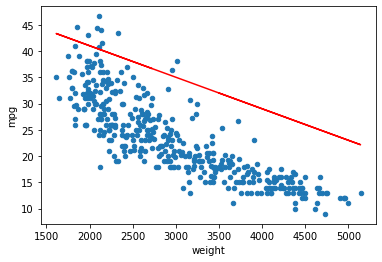

In [ ]:
# Plot the relationship
ax = mtcars.plot(x='weight', y='mpg', kind='scatter') # Keep track of the plotting axis

# Plot a straight line over the top
x = mtcars['weight'].values
intercept = 53
gradient = -0.006
y_pred = intercept + gradient*mtcars['weight']
ax.plot(x, y_pred, c='red')

Rather than using trial and error, we can instead simply ask the computer to find the 'line of best fit' - the line which minimises the distance between the line and all the points (the 'error'). There are many libraries which can be used to fit a straight line to some data, but we'll use scikit-learn's linear regression model as it mimics the syntax we'll use for more complex models later on.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression() # Create the model
x = mtcars['weight'].values # Our inputs
y = mtcars['mpg'] # Desired outputs
model.fit(x.reshape(-1, 1), y) # Try leaving out .reshape - this is because we normally have many input features

# Print the model parameters
print('Intercept: ', model.intercept_)
print('Gradient: ', model.coef_)

Intercept:  46.31736442026565
Gradient:  [-0.00767661]


You can see that the model has 'learnt' the intercept and gradient that best describe this relationship. We could use these to calculate the predicted fuel efficiency for a 3000 pund car like so:

In [ ]:
46.31736442026565 + (-0.00767661)*3000

23.287534420265647

But that's the hard way! We can instead simply call `model.predict()`:

In [ ]:
model.predict([[3000]])

array([23.28753423])

### Multiple Regression

This is great, but what if we have multiple inputs? We know heavier cars are less efficient in general, but it also matters how old the car is, how fast it goes and so on. The nice thing with our linear model is that we can simply add these factors together - we have one intercept and then a different gradient for each input. For N inputs, we'll have N+1 parameters to learn (one for each input and one for the intercept). Here that is in practice:

In [ ]:
model = LinearRegression() # Create the model
X = mtcars[['weight', 'acceleration']].values # Our inputs - capital X since we have more than one
y = mtcars['mpg'] # Desired outputs
model.fit(X, y) # No need to reshape any more

# Print the model parameters
print('Intercept: ', model.intercept_)
print('Gradients: ', model.coef_) # Note: one for each input

Intercept:  41.399828302000174
Gradients:  [-0.00733564  0.25081589]


## Metrics for Regression

TODO metrics


In [ ]:
from sklearn.model_selection import train_test_split

# Define our inputs (X) and our output (y)
X = mtcars.drop(['mpg', 'car name'], axis=1)
y = mtcars['mpg']

# We split our data, so we see how well any models we make do on the 'test' set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8442527203494318

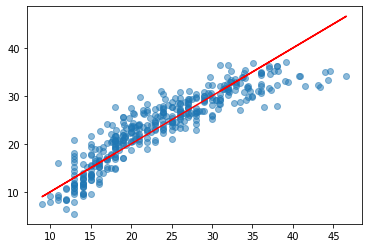

In [ ]:
plt.scatter(y, model.predict(X), alpha=0.5)
plt.plot(y, y, c='red') # All predictions should lie on this line for a perfect model

### Feature Engineering

TODO fill missing values

TODO encode origin

## Decision Trees and Random Forests

![](https://assets.unenvironment.org/styles/topics_content_promo/s3/2020-05/nature-3294681_1920%20%281%29.jpg?null&itok=ZMr-gnRD)

The next model we'll look at is a little more complicated than linear regression, but also more intuitive. DTREE explanation

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = mtcars[['weight', 'acceleration']].values # Our inputs - capital X since we have more than one
y = mtcars['mpg']

dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train, y_train)
print('Train score:', dtree.score(X_train, y_train))
print('Test score:', dtree.score(X_test, y_test))

Train score: 0.8315628909388982
Test score: 0.7790820679170138


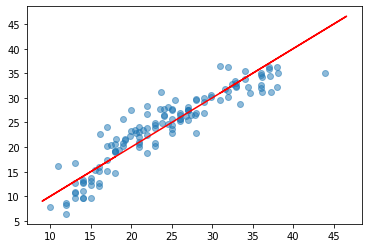

In [ ]:
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.plot(y, y, c='red') # All predictions should lie on this line for a perfect model

Try a deeper tree (max_depth=12) or leave out the max_depth parameter - what happens to the train score and the test score?

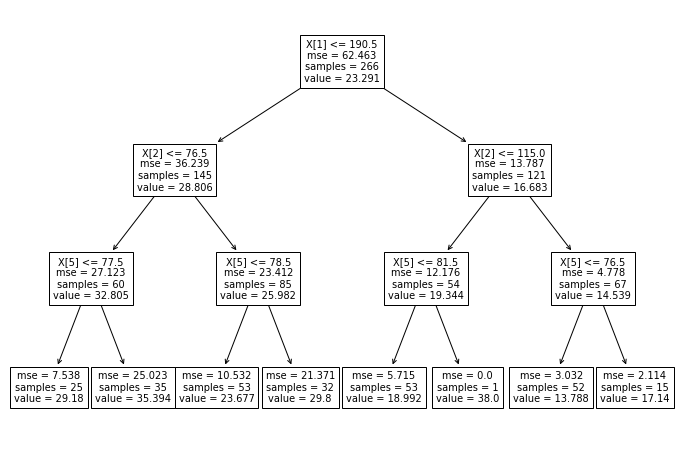

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8)) # Optional way to make the plot bigger
plot_tree(dtree)
plt.show()

In [ ]:
# TODO talk about overfitting more

### Ensembles: Teamwork for the win!

DTREES can overfit

Ensembles: diverse models

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Exercise: fit a model - how does it compare?

## Cheating with PyCaret

In [ ]:
# TODO

## Exercises

In [ ]:
# Exercise: Fit a linear model to the boston dataset
import sklearn.datasets
data = sklearn.datasets.load_boston() # Loading the data - it's built in to sklearn!
print('Data dictionary keys:', data.keys()) # This is a dictionary conatining our features, target, feature names, a description etc
boston = pd.DataFrame(data['data'], columns=data['feature_names']) # Convert to a dataframe
boston['target'] = data['target'] # Add the target column
print(boston.shape)
boston.head()
# Do a brief explore of the data
# Which columns have the highest correlation with the target?
# Fit a linear model
# Plot predicted vs actual

Data dictionary keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# TODO classification section

If you'd like a lovely introduction to the idea of machine learning and deep learning, the [first lesson in the fastai course](https://course.fast.ai/videos/?lesson=1) is excellent - you could also save that for a follow-on to lesson 5. And lesson 5 goes much deeper into Random Forests and is also highly recommended.